Memória de cálculo 
========================================
Lista 3 
========================================
Victor Moraes
========================================


Funções implementadas:
=============================


In [1]:
from sigproc import *
s_dir="tex_source/img/"


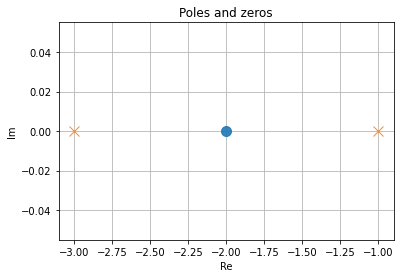

In [2]:
def plot_zpk(zeros, poles, k):
    t1 = plt.plot(zeros.real, zeros.imag, 'o', markersize=10.0, alpha=0.9)
    t2 = plt.plot(poles.real, poles.imag, 'x', markersize=10.0, alpha=0.9)
    grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
    title('Poles and zeros')
    mark_overlapping(zeros)
    mark_overlapping(poles)
    plt.ylabel("Im")
    plt.xlabel("Re")

def mark_overlapping(items):
    """
    Given `items` as a list of complex coordinates, make a tally of identical 
    values, and, if there is more than one, plot a superscript on the graph.
    """
    d = defaultdict(int)
    for i in items:
        d[i] += 1
    for item, count in d.items():
        if count > 1:
            plt.text(item.real, item.imag, r' ${}^{' + str(count) + '}$', fontsize=13)


#teste
num = np.poly1d([1,2])
d1= np.poly1d([1,1])
d2= np.poly1d([1,3])
den = d1*d2
sys = signal.TransferFunction(num,den)
z,p,k = signal.tf2zpk(num,den)
plot_zpk(z,p,k)            

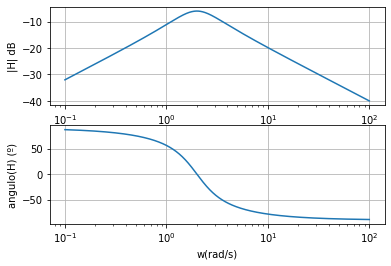

In [3]:
def bode_from_tf(num,dem,start,end):
    start_freq, end_freq, samples=(start,end,1000)
    s1 = signal.lti(num,dem)
    w, mag, phase = s1.bode(w=np.logspace(start_freq,end_freq,samples))
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag)    # Bode magnitude plot
    plt.ylabel("|H| dB")
    plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase)  # Bode phase plot
    plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    plt.ylabel("angulo(H) (º)")
    plt.xlabel("w(rad/s)")
    plt.show()

coef_denominador = [1, 2, 4]
coef_numerador= [1, 0]
bode_from_tf(coef_numerador, coef_denominador, -1,2)

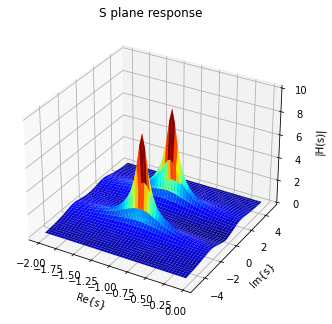

In [4]:

from matplotlib import cm
import numpy as np
import mpmath
def plot_surf(num,den,yrang,xrang,zrang,samples=50):
    import pylab
    from mpl_toolkits.mplot3d import Axes3D
    mpmath.dps = 5
    #%matplotlib widget
    fig = pylab.figure()
    ax = Axes3D(fig)
    X = np.arange(xrang[0], xrang[1], (xrang[1]-xrang[0])/samples)
    Y = np.arange(yrang[0], yrang[1], (yrang[1]-yrang[0])/samples)
    X, Y = np.meshgrid(X, Y)
    xn, yn = X.shape
    W = X*0
    for xk in range(xn):
        for yk in range(yn):
            z = complex(X[xk,yk],Y[xk,yk])
            w = np.abs(np.polyval(num,z)/np.polyval(den,z))
            W[xk,yk] = w

    #ax.set_zlim3d(0, 100)
    #ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet)
    Z = np.clip(W,zrang[0],zrang[1])
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
    #ax.contourf(X, Y, W, zdir='z', offset=-1, cmap=plt.cm.hot)
    ax.set_zlim(zrang[0], zrang[1])
    #ax.plot_wireframe(X, Y, W, rstride=5, cstride=5)
    ax.set_ylabel("Im{s}")
    ax.set_xlabel("Re{s}")
    ax.set_zlabel("|H(s)|")
    ax.set_title("S plane response")     
    pylab.show()
#test
coef_denominador = [1, 2, 4]
coef_numerador= [1, 0]
plot_surf(coef_numerador,coef_denominador,xrang=[-2,0],yrang=[-5,5],zrang=[0,10])

Questão 3a):
========================================




In [5]:
coef_denominador= [1, 2, 4, 3, 1.25]
polos = np.roots([1, 2, 4, 3, 1.25])
print(f"Poles: {polos}")

coef_numerador= [1, 0, 1, 0]
zeros = np.roots([1, 0, 1, 0])
print(f"Zeros: {zeros}")

Poles: [-0.5+1.5j -0.5-1.5j -0.5+0.5j -0.5-0.5j]
Zeros: [-0.+1.j  0.-1.j  0.+0.j]


Questão 3d):
========================================


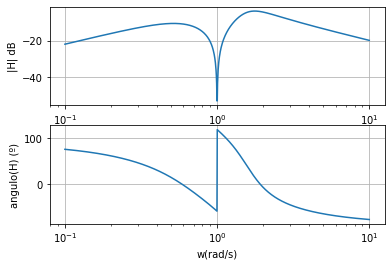

In [6]:

coef_denominador = [1, 2, 4, 3, 1.25]
coef_numerador= [1, 0, 1, 0]
bode_from_tf(coef_numerador, coef_denominador, -1,1)

3.e)
===========================================


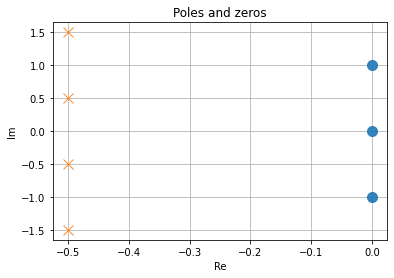

In [7]:
z,p,k = signal.tf2zpk(coef_numerador,coef_denominador)
plot_zpk(z,p,k)     

Questão 4:

 Circuito I
===============================
c),d)
===============================

Ganho: 1000.0, Zeros: [-5000.], Polos: [-3000.+4000.j -3000.-4000.j]


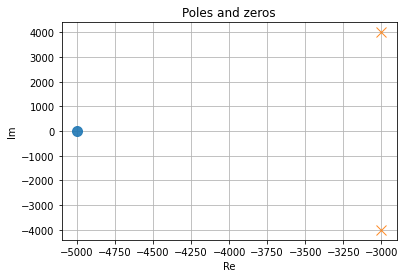

In [20]:
coef_numerador = [1000, 1000*5000]
coef_denominador= [1, 6e3, 25e6]
z,p,k = signal.tf2zpk(coef_numerador,coef_denominador)
plot_zpk(z,p,k)     
print(f"Ganho: {k}, Zeros: {z}, Polos: {p}")

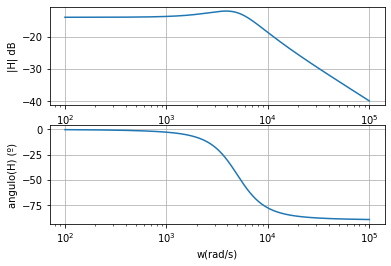

In [21]:

coef_denominador = [1, 6e3, 25e6]
coef_numerador= [1e3, 5e6]
bode_from_tf(coef_numerador, coef_denominador, 2,5)

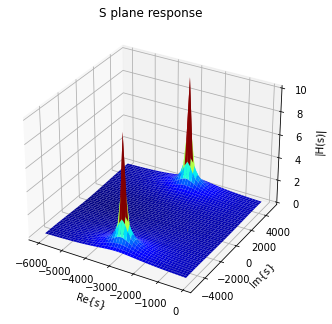

In [22]:
plot_surf(coef_numerador,coef_denominador,xrang=[-6e3,0],yrang=[-5e3,5e3],zrang=[0,10])

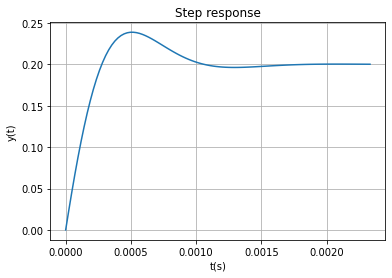

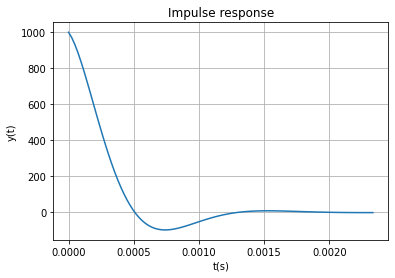

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Impulse response'}, xlabel='t(s)', ylabel='y(t)'>)

In [11]:
t,y = signal.step((z,p,k))
plotsin(y,t, title="4_g_I Step response", save=s_dir)
t,y = signal.impulse((z,p,k))
plotsin(y,t, title="4_g_I Impulse response", save=s_dir)


 Circuito II
===============================
c)
===============================

Ganho: -100.0, Zeros: [-200.], Polos: [-600.    0.]


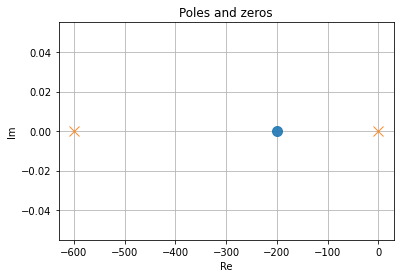

In [12]:
coef_numerador = [-100, -100*200]
coef_denominador= [1, 600, 0]
z,p,k = signal.tf2zpk(coef_numerador,coef_denominador)
plot_zpk(z,p,k)     
print(f"Ganho: {k}, Zeros: {z}, Polos: {p}")

d)
===============================

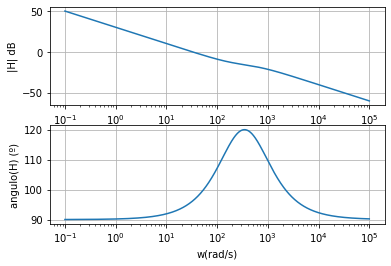

In [13]:

coef_denominador = [1, 600, 0]
coef_numerador= [-100, -20000]
bode_from_tf(coef_numerador, coef_denominador, -1,5)

f)
===============================

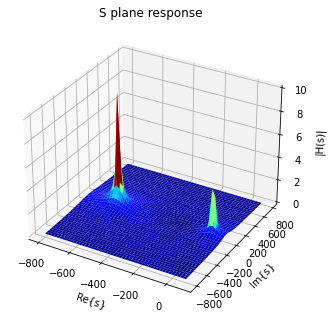

In [14]:
plot_surf(coef_numerador,coef_denominador,xrang=[-800,100],yrang=[-800,800],zrang=[0,10])

g)
===============================

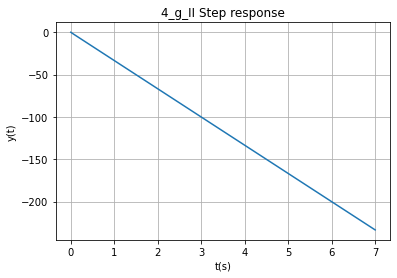

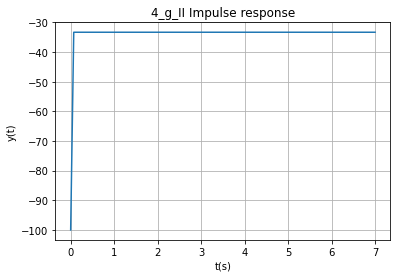

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'4_g_II Impulse response'}, xlabel='t(s)', ylabel='y(t)'>)

In [19]:
t,y = signal.step((z,p,k))
plotsin(y,t, title="4_g_II Step response", save=s_dir)
t,y = signal.impulse((z,p,k))
plotsin(y,t, title="4_g_II Impulse response", save=s_dir)


h)
===============================